In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_column',None)

In [3]:
original_df = pd.read_csv("../data/interim/02_cleaned_data.csv")

In [276]:
df = original_df.copy()

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

## Preliminary Analysis

In [278]:
df.isna().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day       1640
distance                3630
distance_type           3630
dtype: int64

In [279]:
#total num of rows with missing values
df.isna().any(axis=1).sum()

7438

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

In [281]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [282]:
#check duplicate
num_cols = ['age','ratings','restaurant_latitude','restaurant_longitude','delivery_latitude','delivery_longitude','time_taken','pickup_time_minutes','distance']
cat_cols = [col for col in df.columns if col not in num_cols]

In [283]:
cat_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_day',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_hour',
 'order_time_of_day',
 'distance_type']

In [284]:
len(num_cols) , len(cat_cols)

(9, 18)

In [285]:
df.assign(**{
    col: df[col].astype('object') for col in cat_cols
}).describe(include='object').T

count unique              top     freq
rider_id               45502   1320  PUNERES01DEL01        67
order_date             45502     44       2022-03-15     1190
weather                44977      6              Fog     7654
traffic                44992      4              low    15477
vehicle_condition      45502      4                2    15034
type_of_order          45502      4            snack    11512
type_of_vehicle        45502      4       motorcycle    26427
multiple_deliveries  44509.0    4.0              1.0  28109.0
festival               45274      2               no    44380
city_type              44304      3    metropolitian    34029
city_name              45502     22              JAP     3439
order_day              45502     30                3     2323
order_month            45502      3                3    31919
order_day_of_week      45502      7        Wednesday     7077
is_weekend             45502      2                0    32995
order_time_hour      43862.0   17.0             21.0   4686.0
order_time_of_day      43862      5            night    18312
distance_type          41872      4           medium    11288

## Functions to perform analysis

### Numerical Analysis

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_21217/1564148069.py:14: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



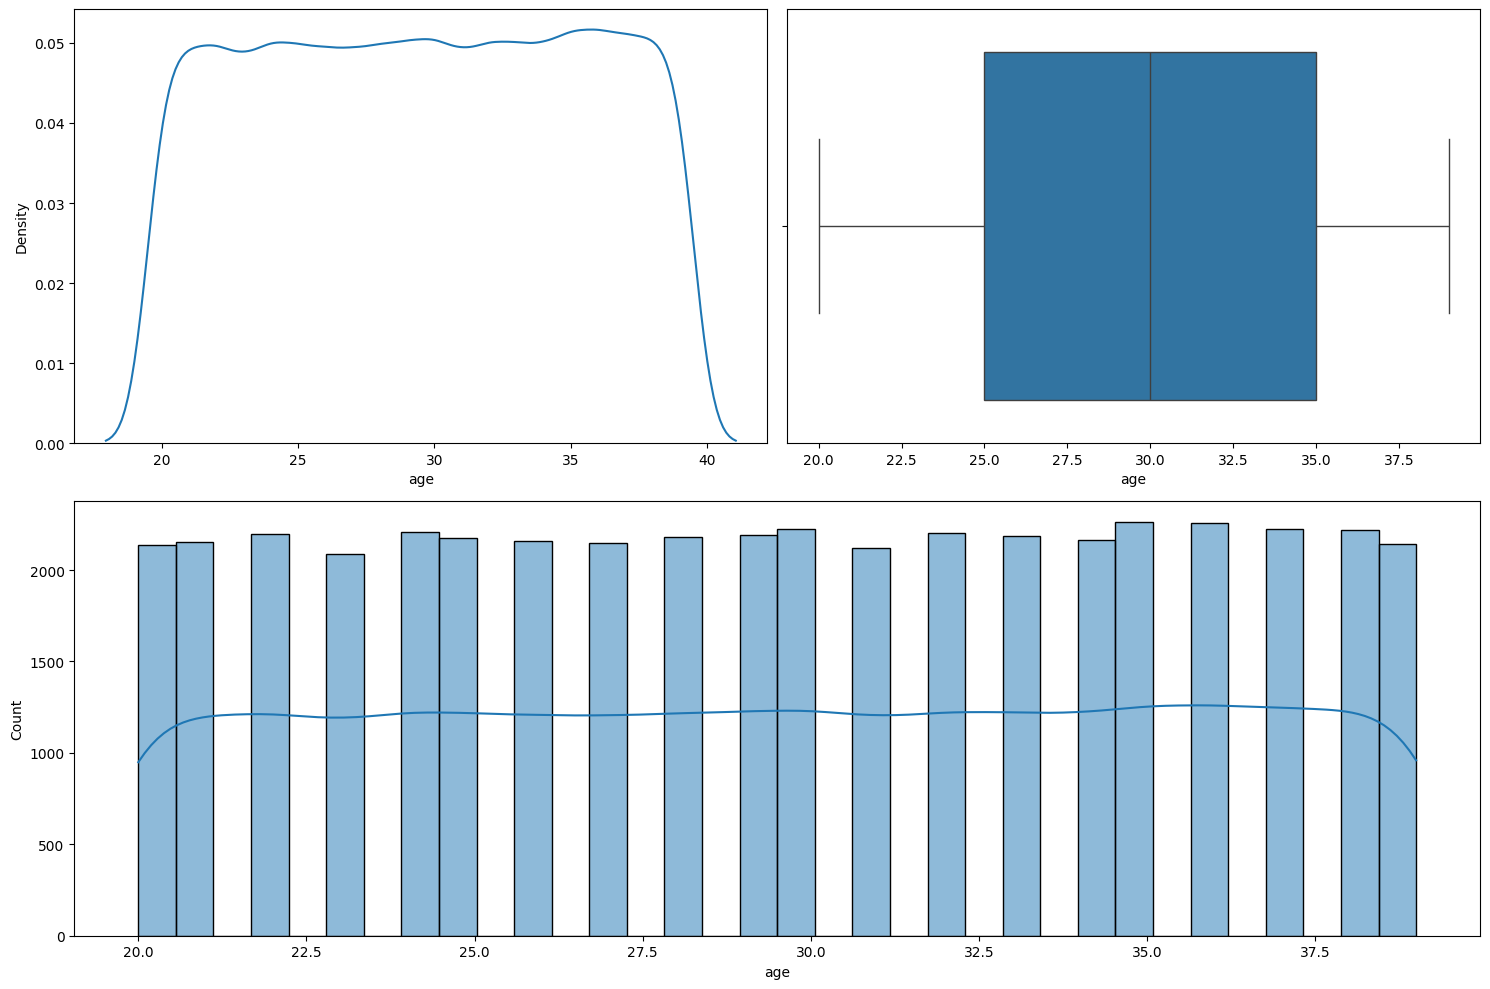

In [286]:
def numerical_analysis(dataframe,column_name,cat_col=None,bins ='auto'):
	fig = plt.figure(figsize=(15,10))
	grid = GridSpec(nrows=2,ncols=2,figure=fig)
   
	axis1 = fig.add_subplot(grid[0,0])
	axis2 = fig.add_subplot(grid[0,1])
	axis3= fig.add_subplot(grid[1,:])
	
	sns.kdeplot(data= dataframe,x=column_name,hue=cat_col , ax=axis1)
	sns.boxplot(data=dataframe,x=column_name,hue=cat_col,ax = axis2)
	sns.histplot
	sns.histplot(data=dataframe,x=column_name,hue=cat_col,bins=bins,kde=True,ax=axis3)
	plt.tight_layout()
	fig.show()

numerical_analysis(df,'age')

### numerical categorical analysis

In [287]:
def numerical_categorical_analysis(dataframe,cat_col,num_col):
	fig,axis = plt.subplots(nrows=2,ncols=2,figsize = (15,10))
	
	sns.barplot(data= dataframe,x=cat_col,y=num_col,ax=axis[0][0])
	axis[0][0].set_title(f'{cat_col} vs {num_col} barplot')
	# axis[0][0].tick_params(axis = 'x',rotation = 45)
	
	sns.boxplot(data=dataframe,x=cat_col,y=num_col,ax=axis[0][1])
	axis[0][1].set_title(f'{cat_col} vs {num_col} boxplot')

	sns.violinplot(data=dataframe,x=cat_col,y=num_col,ax=axis[1][0])
	axis[1][0].set_title(f'{cat_col} vs {num_col} violinplot')

	sns.stripplot(data=dataframe,x=cat_col,y=num_col,ax=axis[1][1])
	axis[1][1].set_title(f'{cat_col} vs {num_col} stripplot')
	plt.tight_layout()
	fig.show()

### Categorical analysis

In [288]:
def categorical_analysis(dataframe,cat_col):
 display(
  pd.DataFrame({
					"Count":dataframe[cat_col].value_counts(),
					"Percentage":dataframe[cat_col].value_counts(normalize=True).mul(100).round(2).astype('str').add('%')
     })
     )
 print(f'num of unique categories = {dataframe[cat_col].nunique()}')
 print(f'unique categories = {dataframe[cat_col].unique()}')
 sns.countplot(data=dataframe,x=cat_col)
 plt.xticks(rotation = 45)
 plt.show()



In [289]:
def multivariate_analysis(dataframe, num_column, cat_column_1, cat_column_2):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, gap=0.1, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, gap=0.1,
                   y=num_column,hue=cat_column_2, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1,
                  y=num_column,hue=cat_column_2,dodge=True,ax=ax2[1])
    plt.tight_layout()
    plt.show()

### chi2 test

In [290]:
#chi squre test for independence
#used to check association between 2 categorical columns
from scipy.stats import chi2_contingency
def chi_2_test(dataframe,cat_col1,cat_col2,alpha=0.05):
 data = dataframe.loc[:,[cat_col1,cat_col2]].dropna()
 
	#create contingency table
 contingency_table = pd.crosstab(index = data[cat_col1],columns=data[cat_col2])
 chi_stat,p_value,dof,expect_values_table= chi2_contingency(contingency_table)
 print('p-value is ',p_value)
 if p_value<=alpha:
  print(f'reject the null hypothesis --> There is significant association between {cat_col1} and {cat_col2}')
 else:
  print(f'cannot reject the null hypothesis --> There is no significant association between {cat_col1} and {cat_col2}')
 display(contingency_table , expect_values_table)

chi_2_test(df,'weather','traffic')

p-value is  0.4796388074753828
cannot reject the null hypothesis --> There is no significant association between weather and traffic


traffic     high   jam   low  medium
weather                             
Cloudy       744  2349  2605    1838
Fog          776  2429  2597    1852
Sandstorms   701  2399  2609    1786
Stormy       733  2323  2699    1831
Sunny        735  2289  2475    1785
Windy        735  2351  2484    1852

array([[ 741.25139516, 2369.18958579, 2591.86659848, 1833.69242057],
       [ 752.85803855, 2406.28676879, 2632.45049692, 1862.40469573],
       [ 737.21857838, 2356.29988661, 2577.76541343, 1823.71612157],
       [ 746.16946439, 2384.90873113, 2609.06316562, 1845.85863886],
       [ 716.46432621, 2289.96509327, 2505.19590013, 1772.37468039],
       [ 730.0381973 , 2333.34993441, 2552.65842542, 1805.95344287]])

## Anova

In [291]:
#used to check assocation between a numerical col and a categorical col having more than 2 categories
from scipy.stats import f_oneway
def anova_test(dataframe,num_col,cat_col,alpha=0.05):
 
 data = dataframe.loc[:,[num_col,cat_col]].dropna()
 
 cat_group = dataframe.groupby(cat_col)
 groups = [group[num_col].values for label,group in cat_group]
 f_stat,p_val = f_oneway(*groups)
 if p_val<=alpha:
  print(f'reject null hypothesis -> thre is significant relation between {cat_col} and {num_col}')
 else:
  print(f'cannot reject null hypothesis -> no significant relation between {cat_col} and {num_col}')

anova_test(df,'age','weather')

cannot reject null hypothesis -> no significant relation between weather and age


## Independent 2 sample t test

In [292]:
import scipy.stats as stats
def independent_2sample_ttest(dataframe, cat_col,num_col,alpha = 0.05):
 data = dataframe.loc[:,[cat_col,num_col]].dropna()
 categories = data[cat_col].unique()
 group1 = data[data[cat_col] == categories[0]][num_col]
 group2 = data[data[cat_col] == categories[1]][num_col]
 stat,p_value = stats.ttest_ind(group1,group2,equal_var=False)
 if p_value<=alpha:
  print(f'reject null hypothesis -> thre is significant relation between {cat_col} and {num_col}')
 else:
  print(f'cannot reject null hypothesis -> no significant relation between {cat_col} and {num_col}')



## test for normality

In [293]:
#jarque bera test applied as shapiro-wilk test not reliable for large data (>~5K rows)
from scipy.stats import jarque_bera
def test_for_normality(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    print("Jarque Bera Test for Normality")
    _, p_val = jarque_bera(data)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. The data is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data is normally distributed.",end="\n\n")

## Analysing Columns 

In [294]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

### time_taken --> Target Column

In [295]:
df['time_taken'].dtype

dtype('int64')

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_21217/1564148069.py:14: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



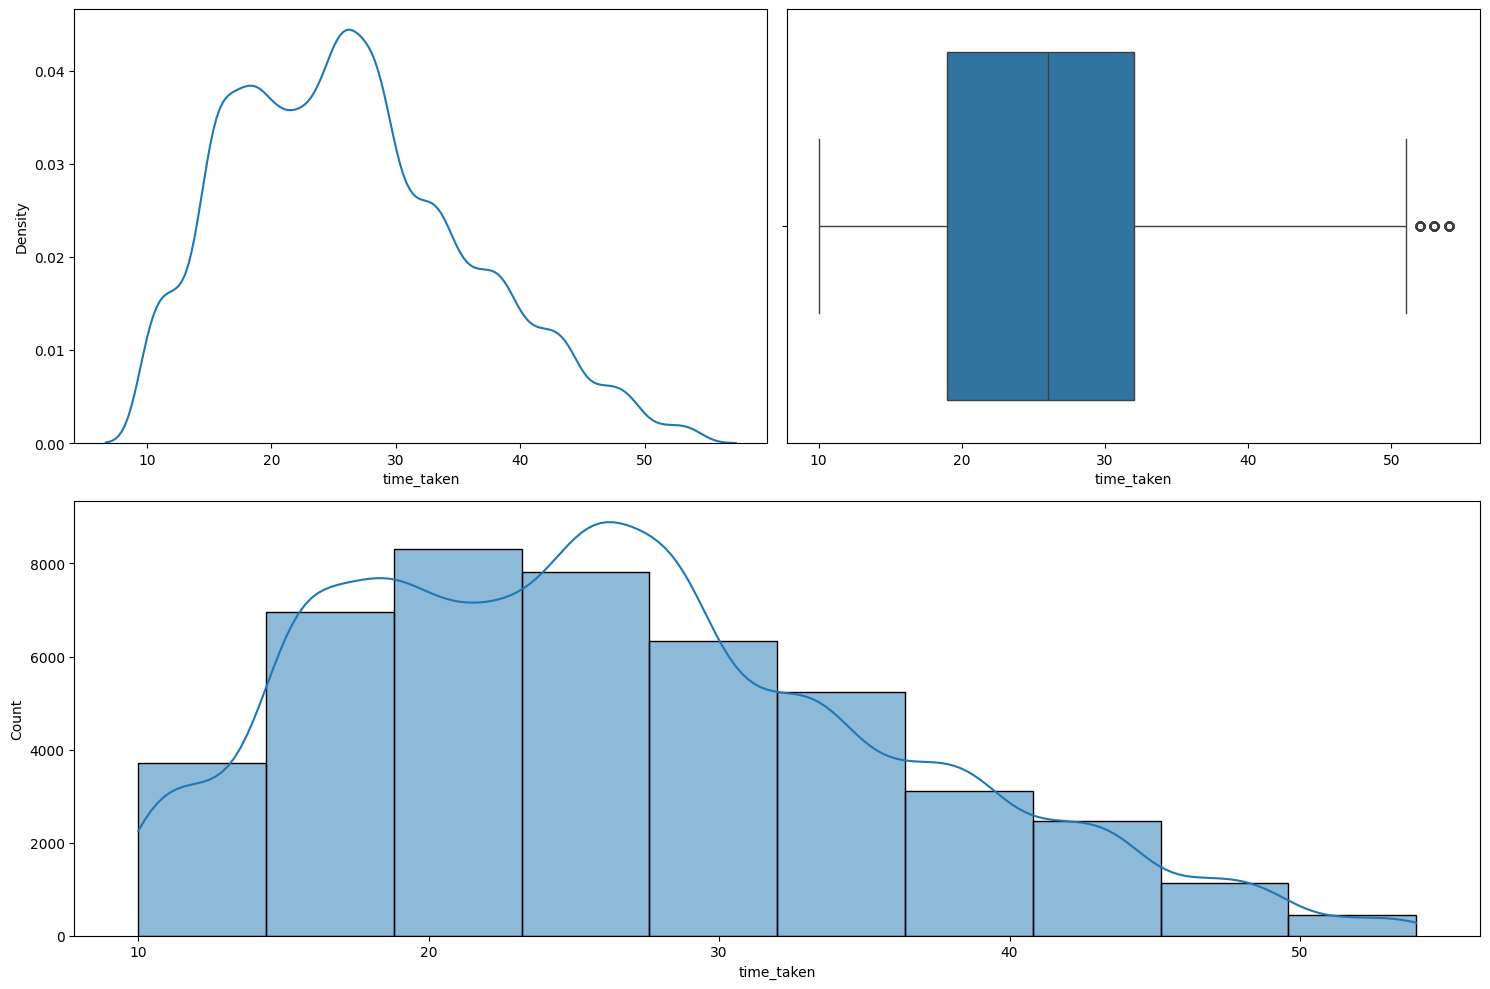

In [296]:
#numerical analysis
numerical_analysis(df,'time_taken',bins=10)

In [297]:
df['time_taken'].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51])

#### Obs:
1. Looks to be bimodal , 1 peak around 17-18 and another around 26-27
2. Some outliers in the upper range, lower range seems clean
3. Not fully continuous distribution

((array([-4.16995158, -3.96319864, -3.8504397 , ...,  3.8504397 ,
          3.96319864,  4.16995158]),
  array([10, 10, 10, ..., 54, 54, 54])),
 (9.264045148605508, 26.297591314667482, 0.9868843995770017))

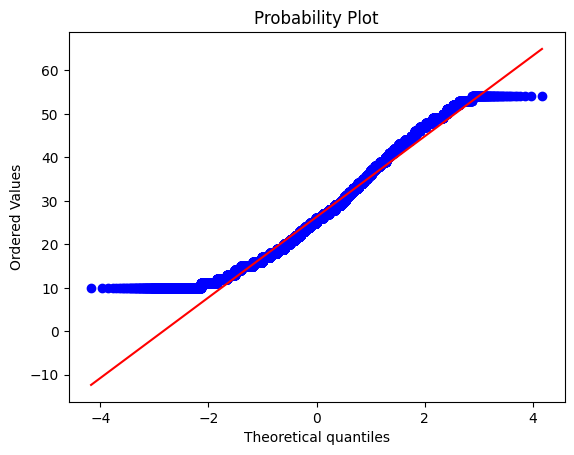

In [298]:
#check if distribution is normal
stats.probplot(x=df['time_taken'],dist='norm',plot=plt)

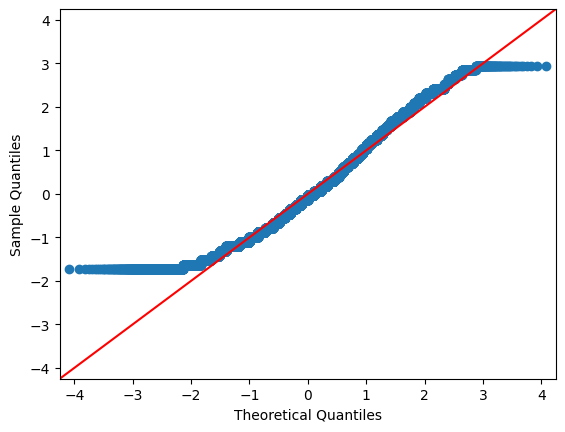

In [299]:
fig = sm.qqplot(df['time_taken'],fit=True ,line='45')

In [300]:
#test for normality
test_for_normality(df,'time_taken')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


In [301]:
#checking out rows where data is acting as outlier
IQR = df['time_taken'].quantile(0.75) - df['time_taken'].quantile(0.25)

upper_bound = df['time_taken'].quantile(0.75) + 1.5*IQR
upper_bound

51.5

In [302]:
outlier_df = df[df['time_taken']>upper_bound]
outlier_df['traffic'].value_counts()

traffic
jam     241
high     24
Name: count, dtype: int64

- OBS
Seems like jam is strong contributor to high delivery time

In [303]:
outlier_df['weather'].value_counts()

weather
Fog           57
Sunny         51
Cloudy        44
Windy         44
Stormy        37
Sandstorms    32
Name: count, dtype: int64

In [304]:
outlier_df['distance'].mean() , df['distance'].mean()

(13.29215081388658, 9.719296323199579)

##### OBS
- Distance for outlier times is higher than average time for overall data
- Distance can be a contributing factor

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_21217/1564148069.py:14: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



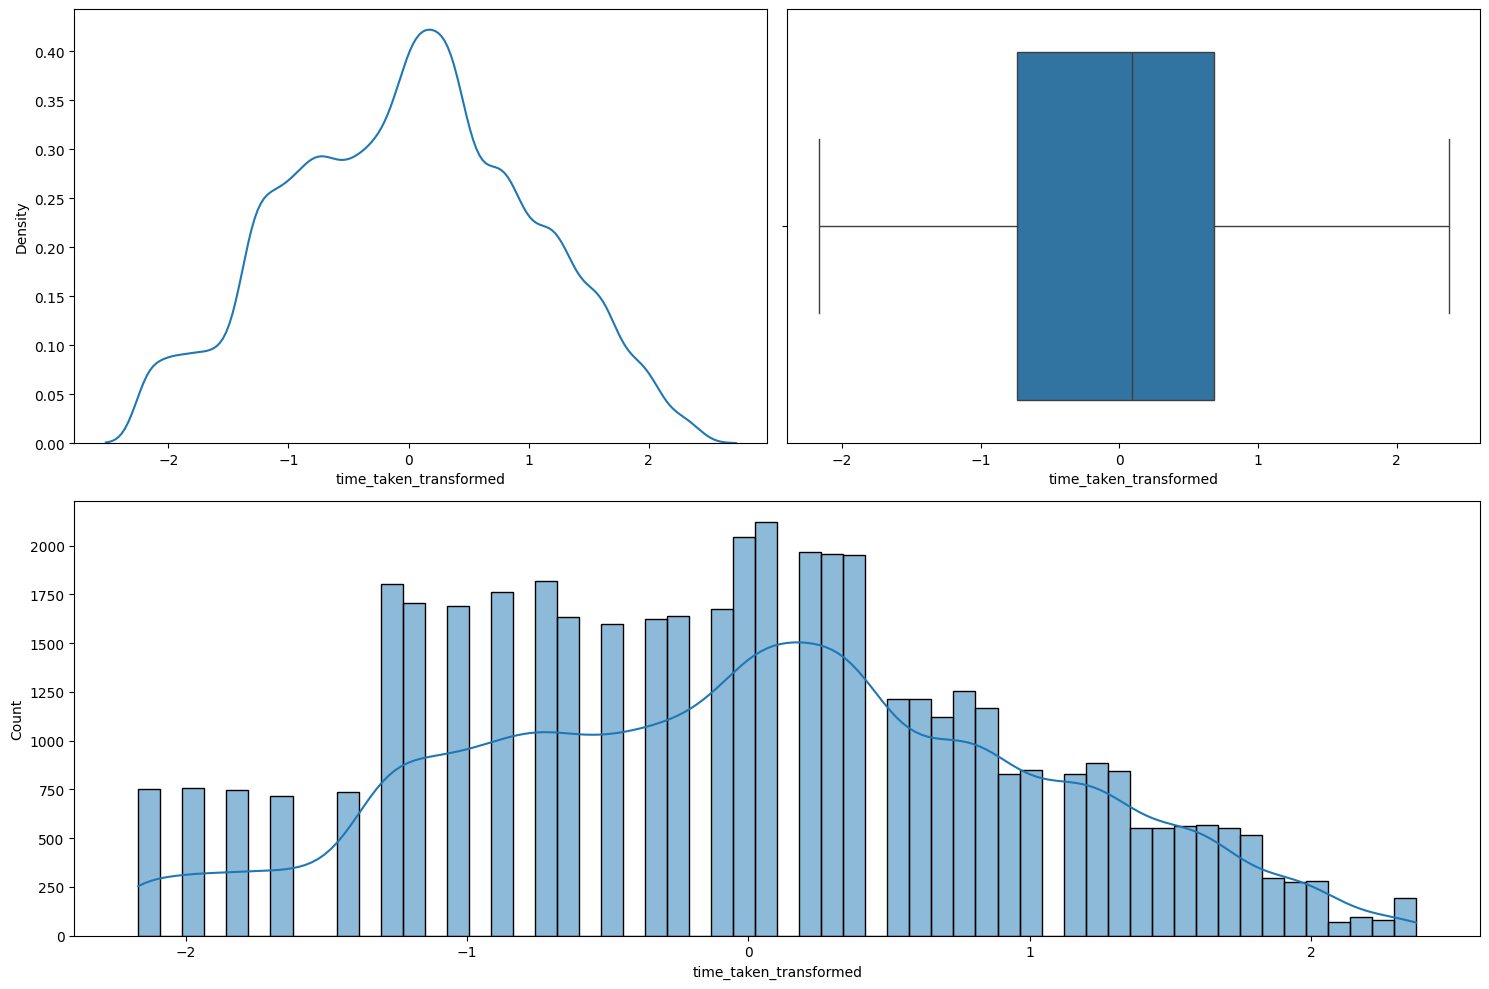

In [305]:
# try to make the distibution normal like
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson')

time_taken_tranformed_df = pd.DataFrame(pt.fit_transform(df[['time_taken']]),columns=['time_taken_transformed'])

numerical_analysis(time_taken_tranformed_df,'time_taken_transformed')
# seems to remove outliers and make the distribution
#also bimodal distibution changed to unimodal


((array([-4.16995158, -3.96319864, -3.8504397 , ...,  3.8504397 ,
          3.96319864,  4.16995158]),
  array([-2.16837776, -2.16837776, -2.16837776, ...,  2.37354703,
          2.37354703,  2.37354703])),
 (0.9953574239385332, 1.1012895908410877e-15, 0.9952675528665531))

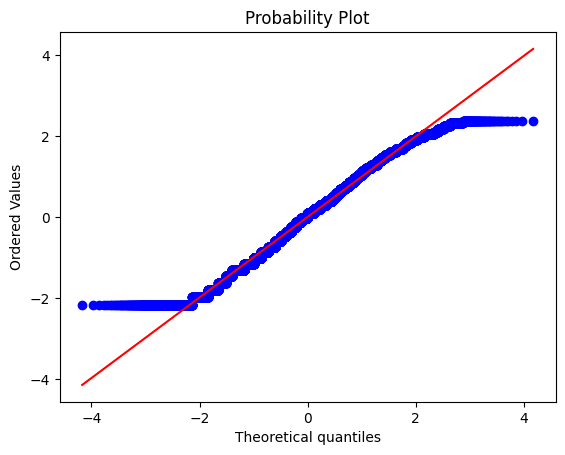

In [306]:
stats.probplot(x= time_taken_tranformed_df['time_taken_transformed'],plot=plt)

- Slight improvement, not much

In [307]:
df['time_taken_pt'] = time_taken_tranformed_df.values

## Age

In [308]:
df['age'].describe()

count    43648.000000
mean        29.555008
std          5.761482
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_21217/1564148069.py:14: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



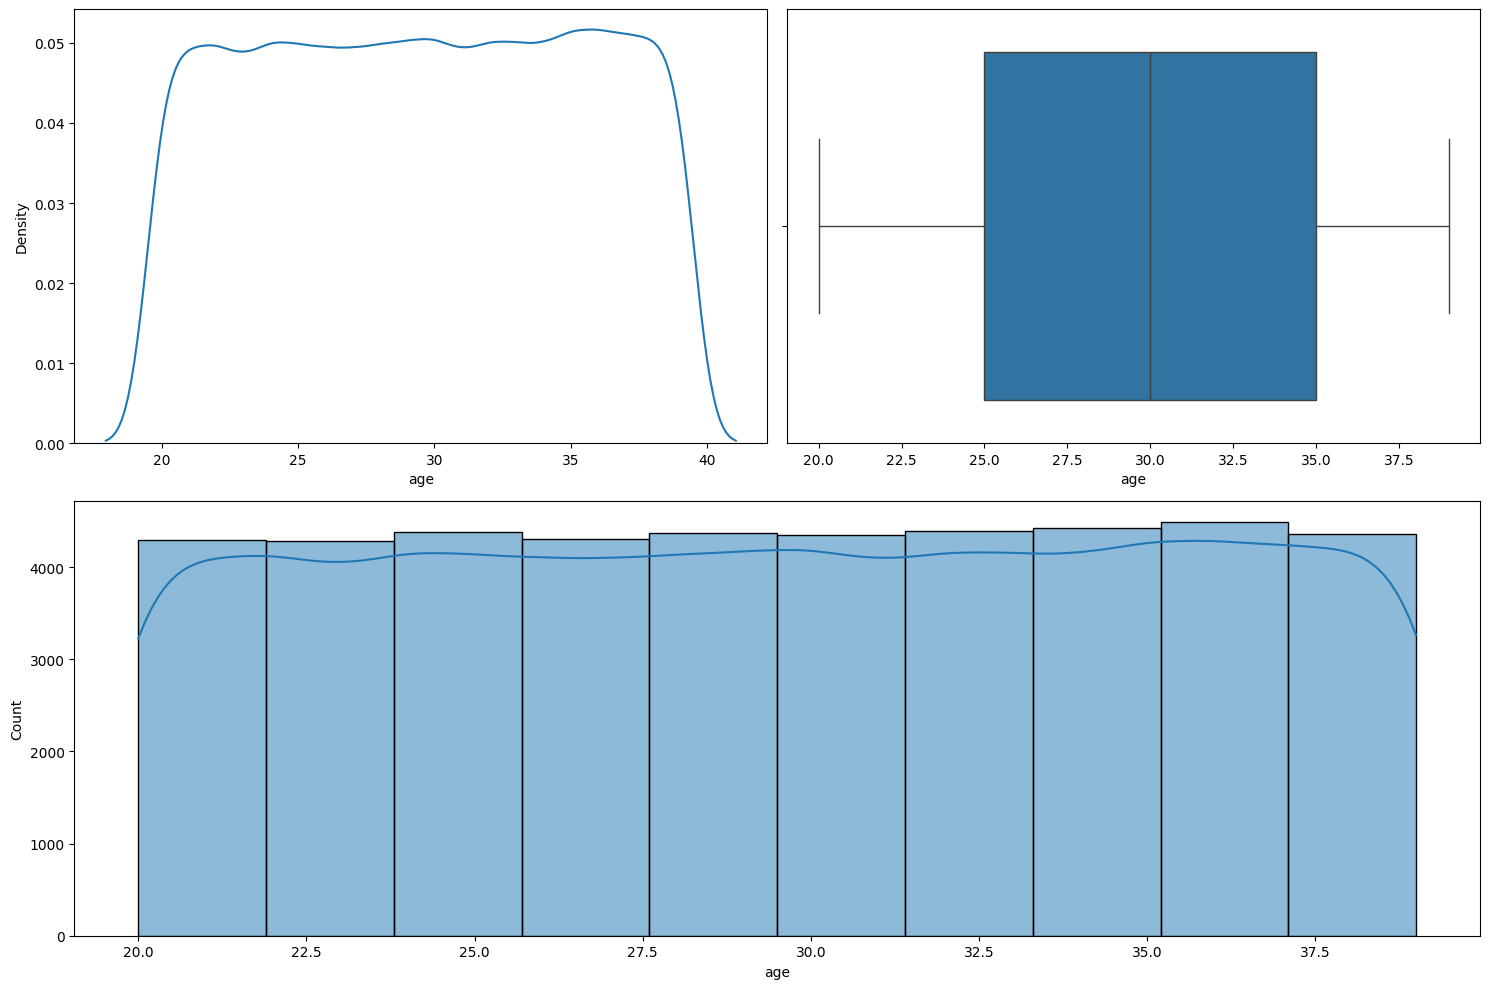

In [309]:
#numerical analysis for age
numerical_analysis(df,'age',bins=10)

- age seems to be uniformly distributed
- No outliers

<Axes: xlabel='age', ylabel='time_taken'>

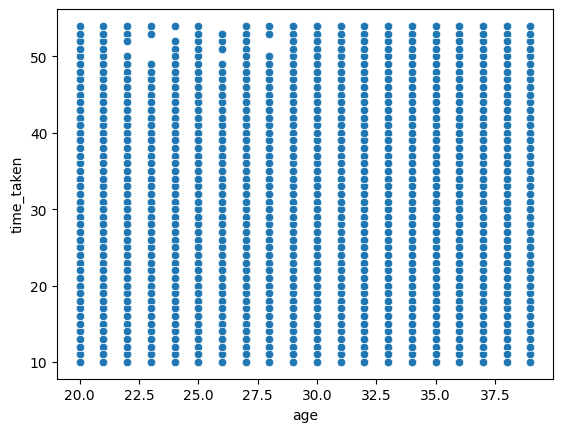

In [310]:
#check relationship with target
sns.scatterplot(data=df,x='age',y='time_taken')

- No director pattern is observed.
- Does not seem to directly impact delivery time
- age is a discrete column

<Axes: xlabel='age', ylabel='time_taken'>

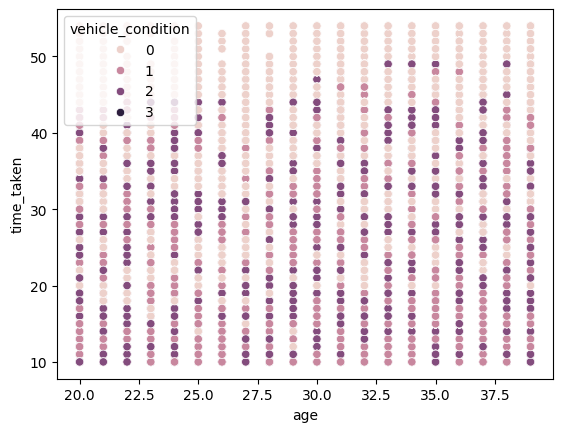

In [311]:

sns.scatterplot(data=df,x='age',y='time_taken',hue='vehicle_condition' )

- No preference for vehicle condition with age
- But observed that for longer delivery_time, vehicle condition 0 is preffered

## Ratings

In [312]:
df['ratings'].describe()

count    43594.000000
mean         4.635287
std          0.313827
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: ratings, dtype: float64

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_21217/1564148069.py:14: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



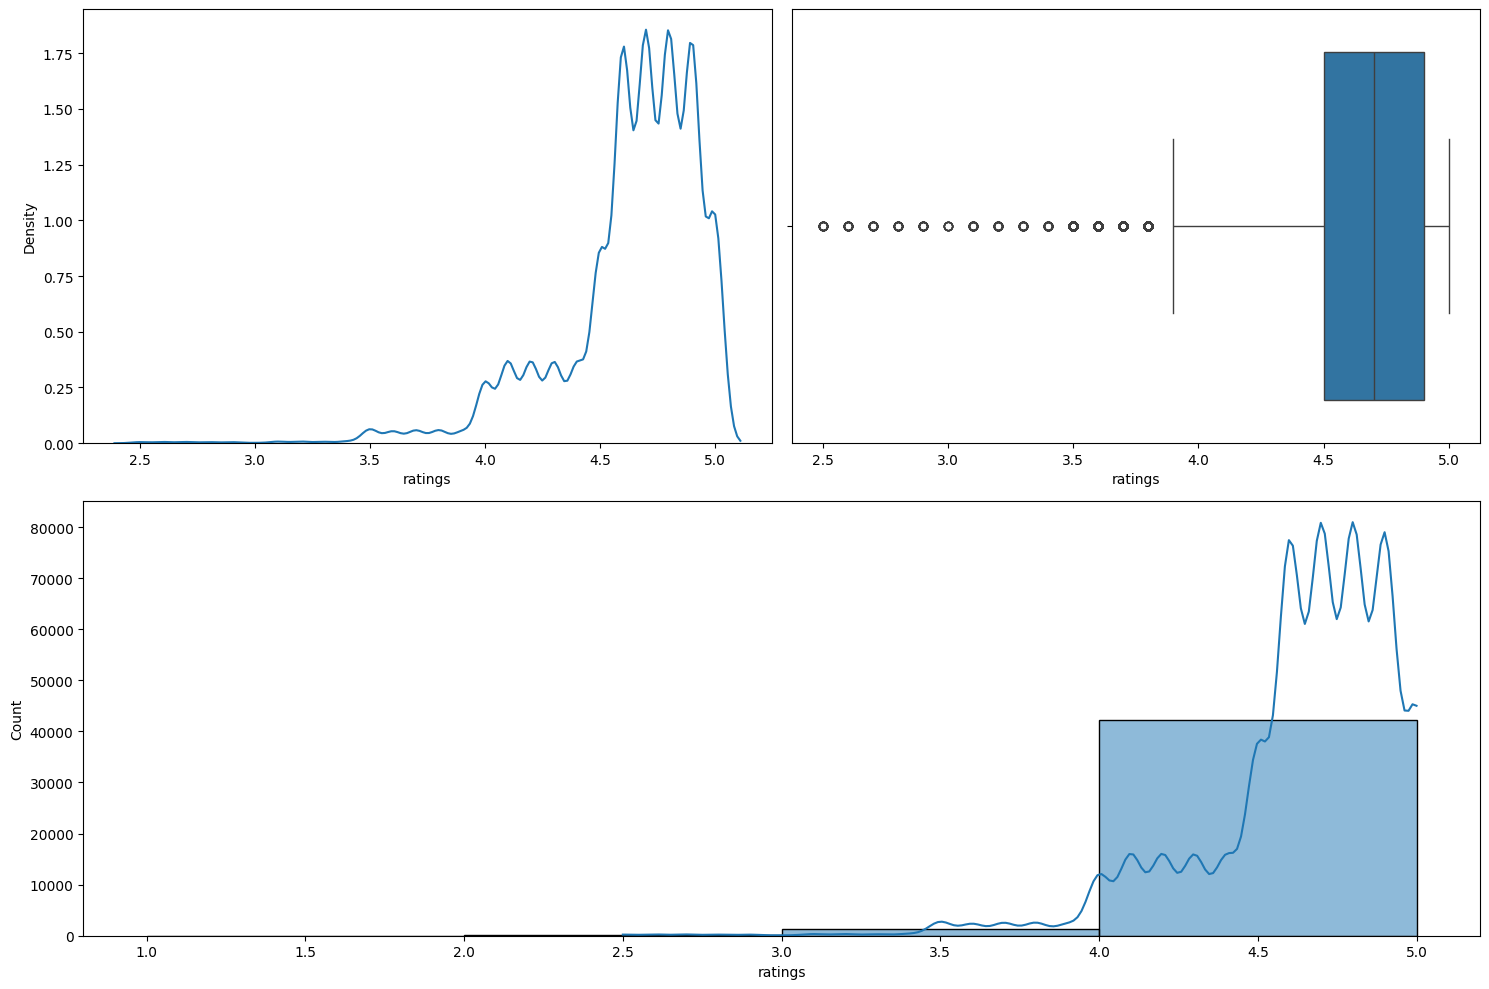

In [313]:
numerical_analysis(df,'ratings',bins = [1,2,3,4,5])

In [314]:
#counting values in each bin
pd.cut(df['ratings'], bins=[1,2,3,4,5], right=True).value_counts()

ratings
(4, 5]    41188
(3, 4]     2298
(2, 3]      108
(1, 2]        0
Name: count, dtype: int64

- Data is highly right skewed

<Axes: xlabel='ratings', ylabel='time_taken'>

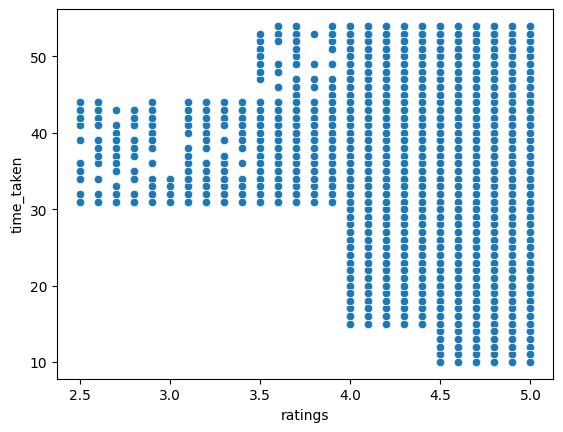

In [315]:
sns.scatterplot(data=df,x='ratings' , y='time_taken')

- seems like riders with higer ratings 4.0 and above, get more orders and more spread in distance(linked to time_taken)

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_21217/2787265622.py:17: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



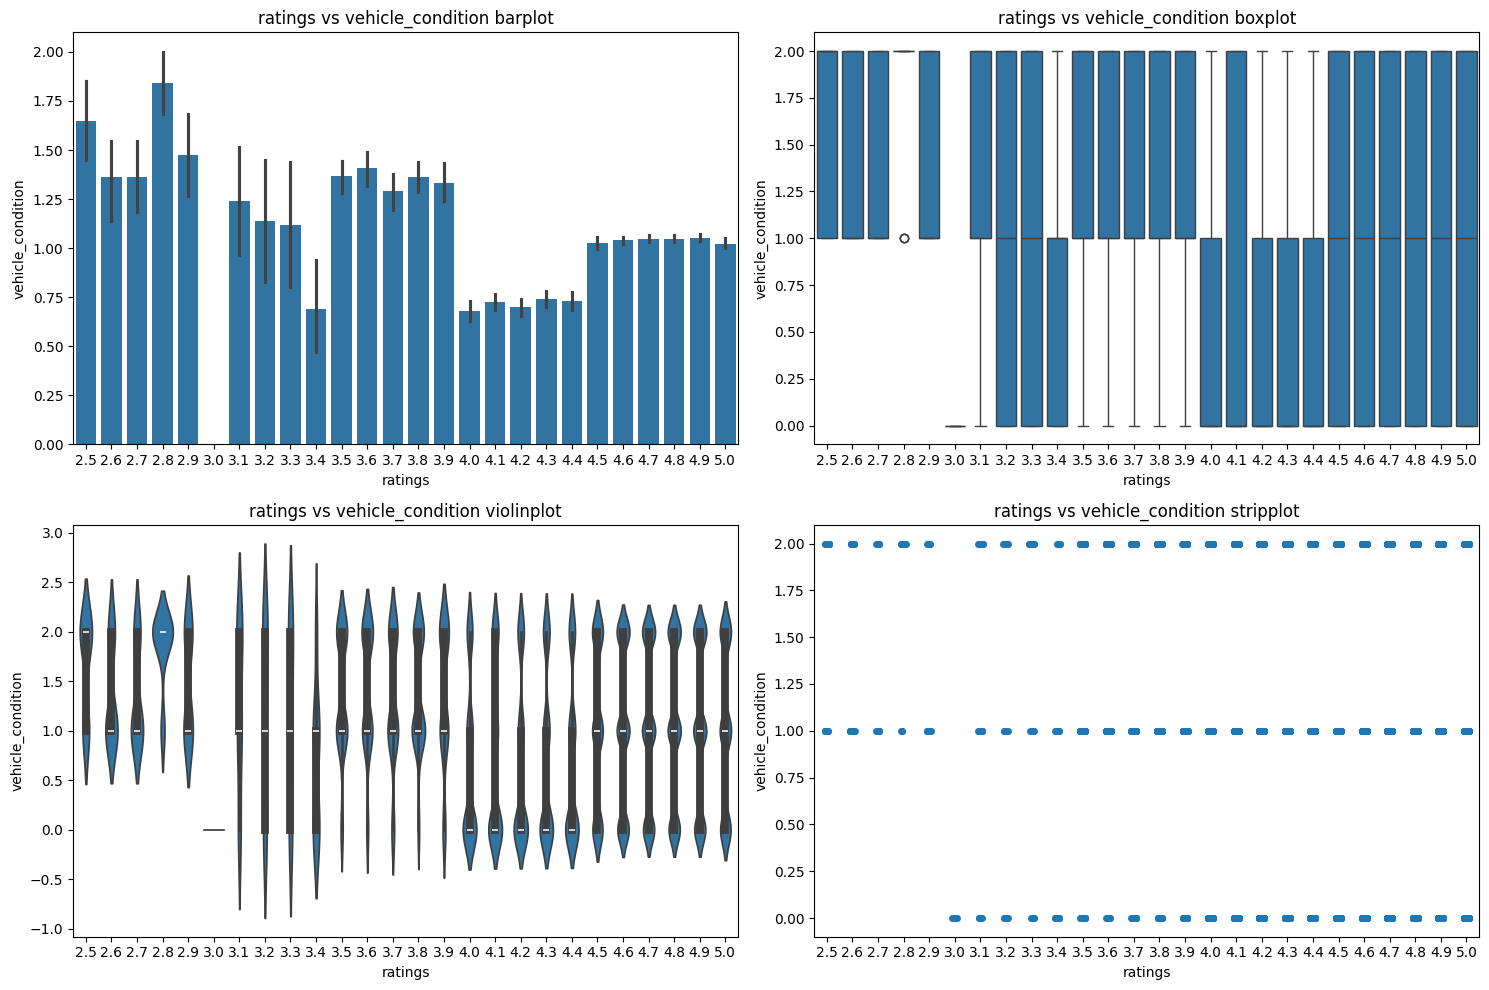

In [316]:
#relation between vehicle condition and rating
numerical_categorical_analysis(df,'ratings', 'vehicle_condition')

- No rating data available for vehicle condition 3(worst condition)
- looking at stripplot -> best vehicle condition(0) has slightly between ratings in lower side

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_21217/2787265622.py:17: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



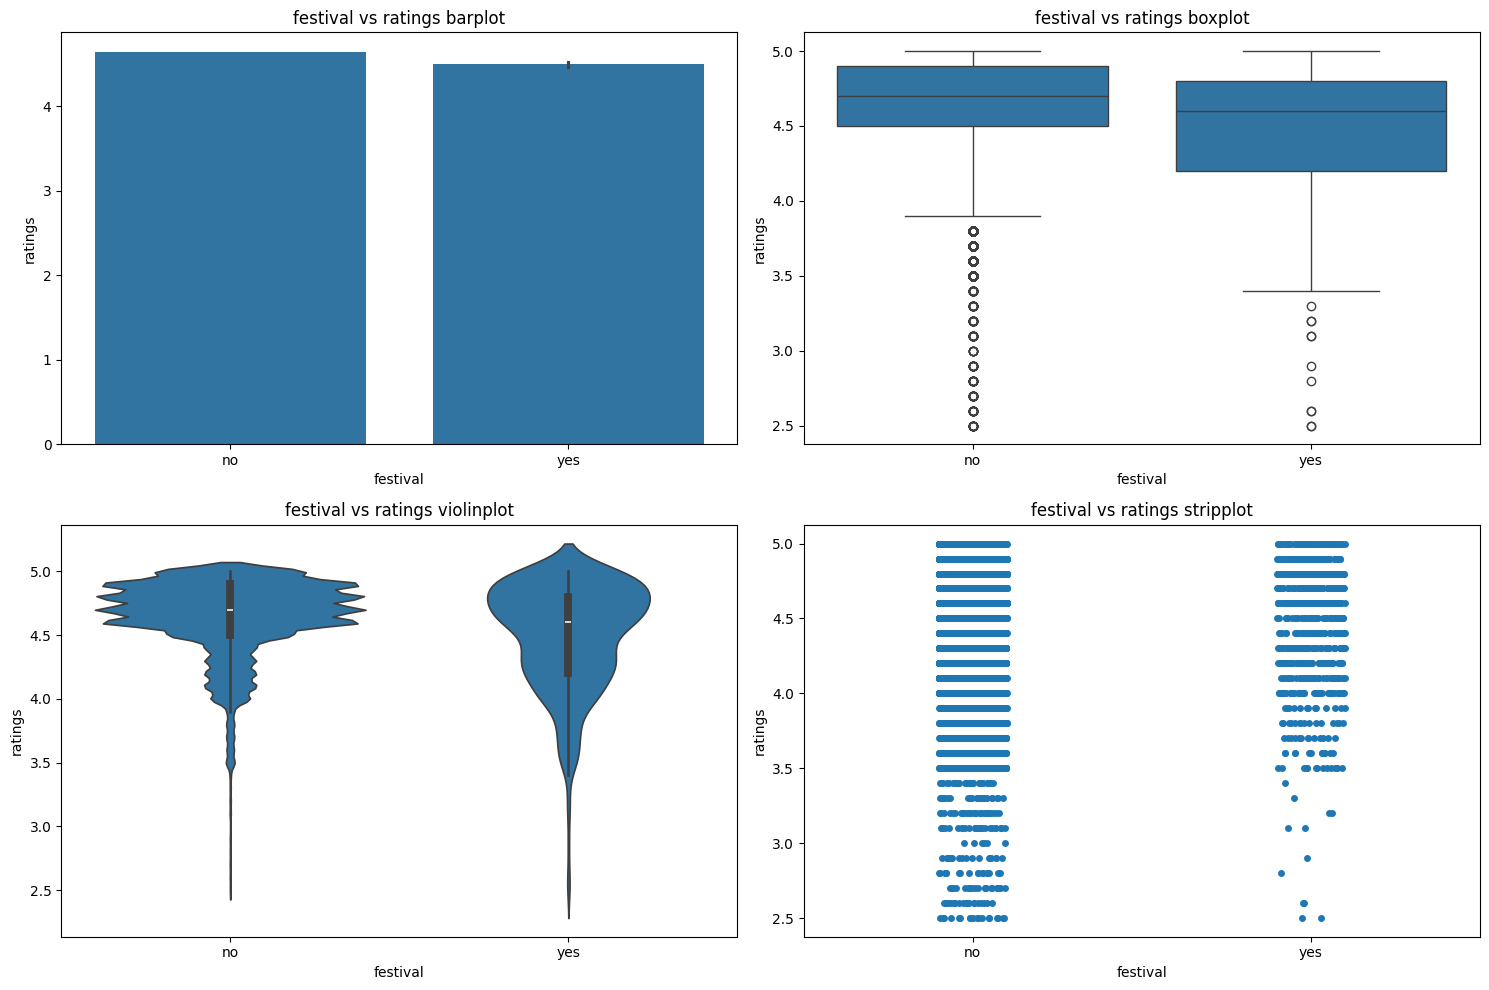

In [317]:
numerical_categorical_analysis(df,'festival','ratings')

- Slight lower average ratings during festivals
- Higher spread in ratings duting festivals
- lower number of very low ratings (<3.5) during festivals whereas there is almost uniform spread during non festival days


## Location Features

In [318]:
location_cols = df.columns[3:7].to_list() + ['city_name']

In [319]:
location_subset = df.loc[:,location_cols]
location_subset.head()

restaurant_latitude  restaurant_longitude  delivery_latitude  \
0            22.745049             75.892471          22.765049   
1            12.913041             77.683237          13.043041   
2            12.914264             77.678400          12.924264   
3            11.003669             76.976494          11.053669   
4            12.972793             80.249982          13.012793   

   delivery_longitude city_name  
0           75.912471      INDO  
1           77.813237      BANG  
2           77.688400      BANG  
3           77.026494     COIMB  
4           80.289982      CHEN

In [320]:
#dropping missing values
location_subset.dropna(how='any',inplace=True)
location_subset

restaurant_latitude  restaurant_longitude  delivery_latitude  \
0                22.745049             75.892471          22.765049   
1                12.913041             77.683237          13.043041   
2                12.914264             77.678400          12.924264   
3                11.003669             76.976494          11.053669   
4                12.972793             80.249982          13.012793   
...                    ...                   ...                ...   
45496            23.371292             85.327872          23.481292   
45497            26.902328             75.794257          26.912328   
45499            13.022394             80.242439          13.052394   
45500            11.001753             76.986241          11.041753   
45501            23.351058             85.325731          23.431058   

       delivery_longitude city_name  
0               75.912471      INDO  
1               77.813237      BANG  
2               77.688400      BANG  
3               77.026494     COIMB  
4               80.289982      CHEN  
...                   ...       ...  
45496           85.437872    RANCHI  
45497           75.804257       JAP  
45499           80.272439      CHEN  
45500           77.026241     COIMB  
45501           85.405731    RANCHI  

[41872 rows x 5 columns]

In [321]:
# plot deliveries on map
import plotly.express as px
delivery_df = pd.DataFrame({
    'latitude': location_subset['delivery_latitude'],
    'longitude': location_subset['delivery_longitude'],
    "city_name": location_subset["city_name"]
})


# Create a map using Plotly's scatter_mapbox
fig = px.scatter_mapbox(
    delivery_df,
    lat='latitude',
    lon='longitude',
    title="Delivery Points",
    hover_name="city_name"
)

# Update the layout for the map of India
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 20.5937, "lon": 78.9629},  # Centered over India
    mapbox_zoom=3,
)

# Show the plot
fig.show()

## Order Date

In [322]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type',
       'time_taken_pt'],
      dtype='object')

In [323]:
df.filter(like = 'order')

order_date type_of_order  order_day  order_month order_day_of_week  \
0      2022-03-19         snack         19            3          Saturday   
1      2022-03-25         snack         25            3            Friday   
2      2022-03-19        drinks         19            3          Saturday   
3      2022-04-05        buffet          5            4           Tuesday   
4      2022-03-26         snack         26            3          Saturday   
...           ...           ...        ...          ...               ...   
45497  2022-03-24          meal         24            3          Thursday   
45498  2022-02-16        buffet         16            2         Wednesday   
45499  2022-03-11        drinks         11            3            Friday   
45500  2022-03-07         snack          7            3            Monday   
45501  2022-03-02         snack          2            3         Wednesday   

       order_time_hour order_time_of_day  
0                 11.0           morning  
1                 19.0           evening  
2                  8.0           morning  
3                 18.0           evening  
4                 13.0         afternoon  
...                ...               ...  
45497             11.0           morning  
45498             19.0           evening  
45499             23.0             night  
45500             13.0         afternoon  
45501             17.0           evening  

[45502 rows x 7 columns]

In [324]:
#order date cols

order_date_subset = df.loc[:,["order_date","order_day","order_month","order_day_of_week","is_weekend","festival"]]
order_date_subset

order_date  order_day  order_month order_day_of_week  is_weekend  \
0      2022-03-19         19            3          Saturday           1   
1      2022-03-25         25            3            Friday           0   
2      2022-03-19         19            3          Saturday           1   
3      2022-04-05          5            4           Tuesday           0   
4      2022-03-26         26            3          Saturday           1   
...           ...        ...          ...               ...         ...   
45497  2022-03-24         24            3          Thursday           0   
45498  2022-02-16         16            2         Wednesday           0   
45499  2022-03-11         11            3            Friday           0   
45500  2022-03-07          7            3            Monday           0   
45501  2022-03-02          2            3         Wednesday           0   

      festival  
0           no  
1           no  
2           no  
3           no  
4           no  
...        ...  
45497       no  
45498       no  
45499       no  
45500       no  
45501       no  

[45502 rows x 6 columns]

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_21217/2787265622.py:17: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



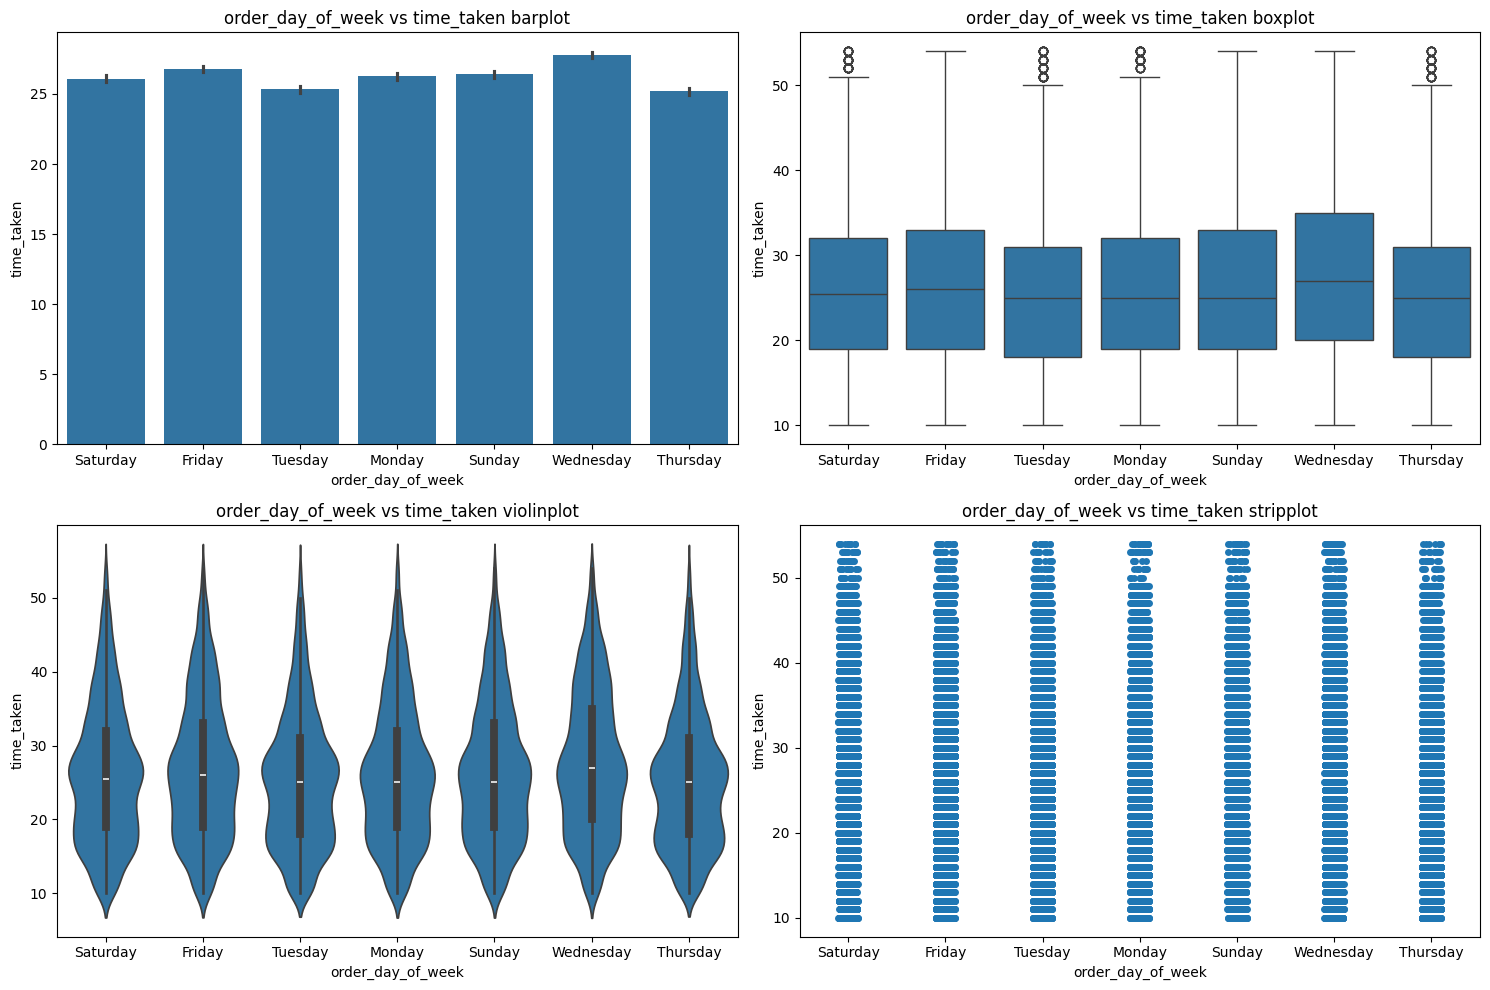

In [325]:
# analysis between day of week and target

numerical_categorical_analysis(df, "order_day_of_week", "time_taken")

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_21217/2787265622.py:17: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



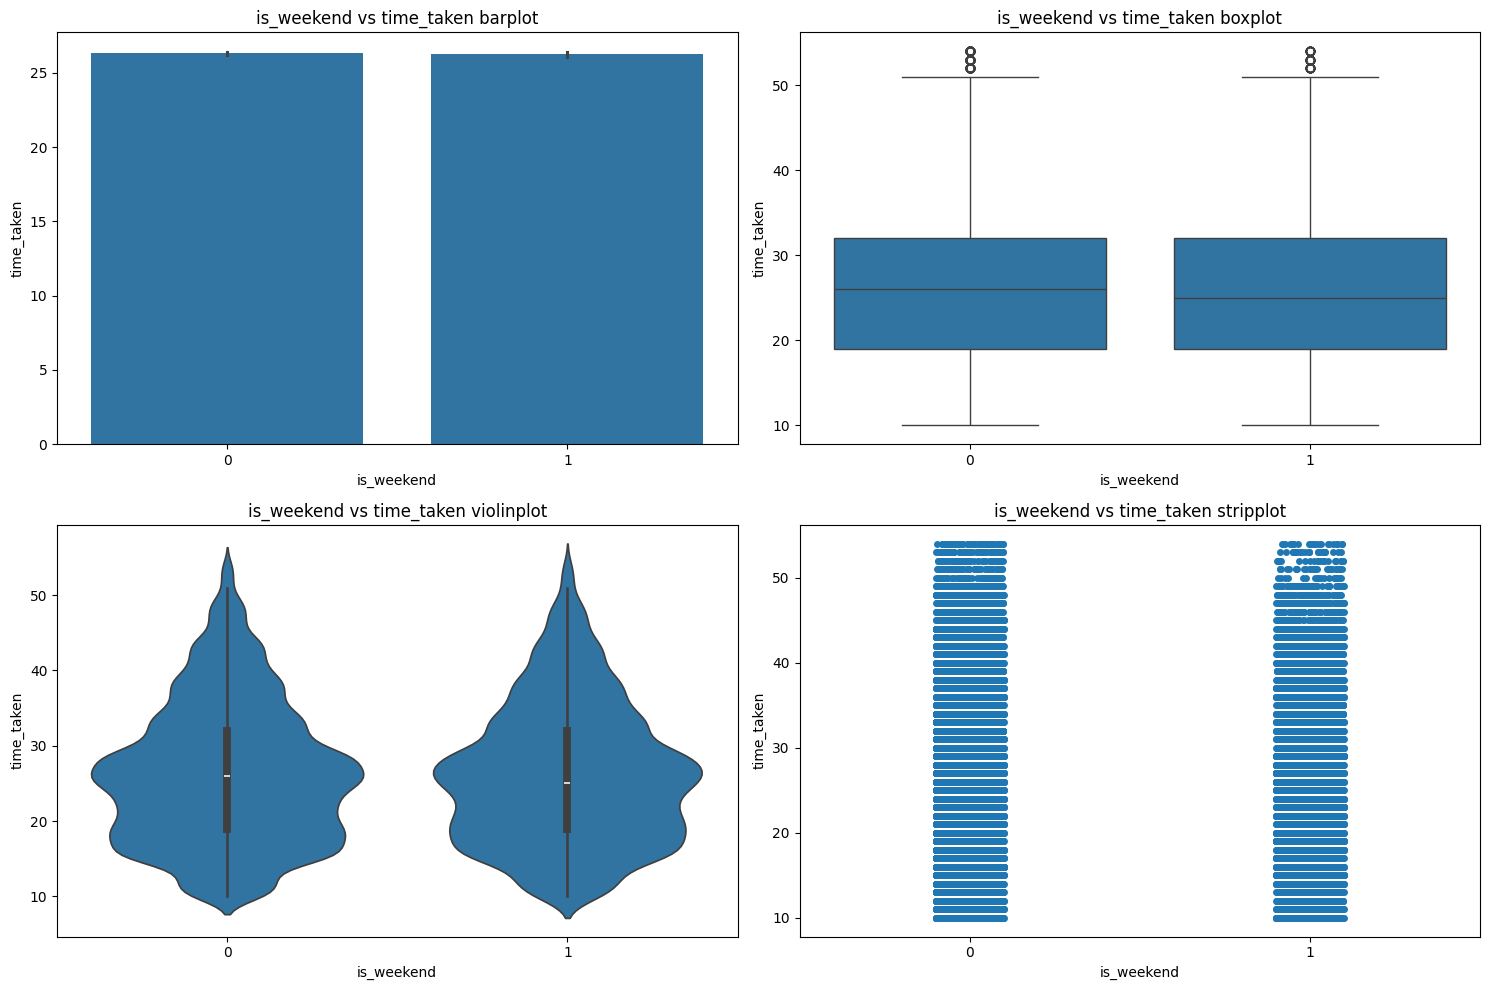

In [326]:
# does having a weekend affects target

numerical_categorical_analysis(df, "is_weekend", "time_taken")

- Does not seem to have any association

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_21217/2787265622.py:17: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



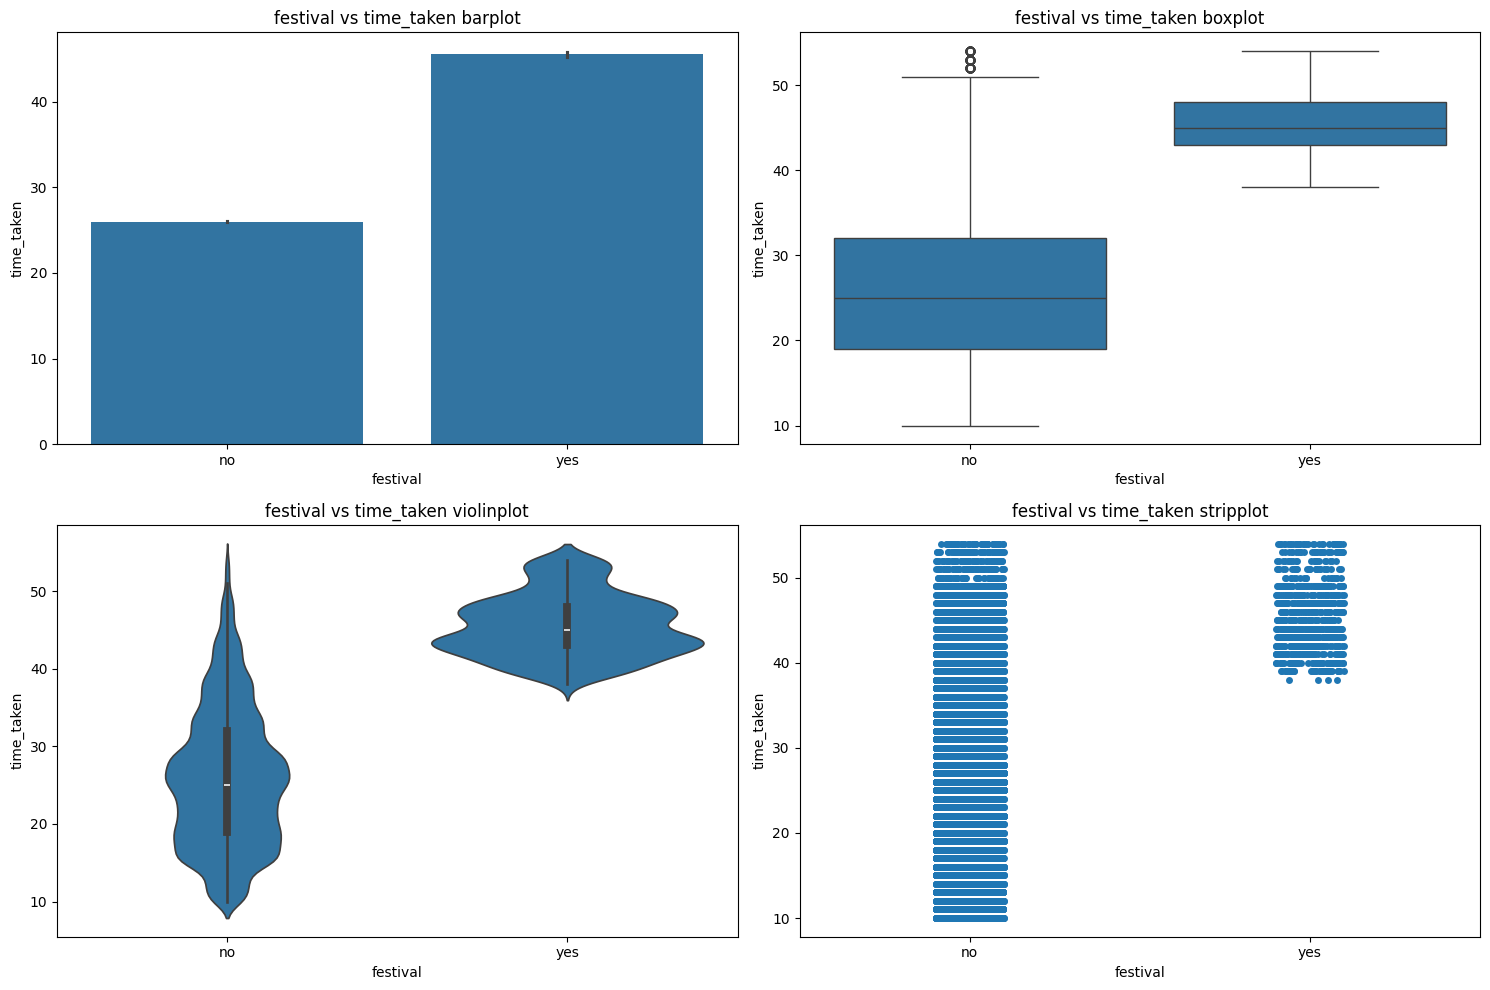

In [327]:
numerical_categorical_analysis(df,'festival','time_taken')

- festival days have higher average delivery times
- Lower range of delivery time during festival though having higher value

In [328]:
independent_2sample_ttest(df,'festival','time_taken')

reject null hypothesis -> thre is significant relation between festival and time_taken


In [329]:
df.pivot_table(index='traffic',columns='festival',values = 'time_taken',aggfunc='mean')

festival         no        yes
traffic                       
high      27.010373  45.826087
jam       30.538039  46.093651
low       21.284332  42.020000
medium    26.550288  43.715385

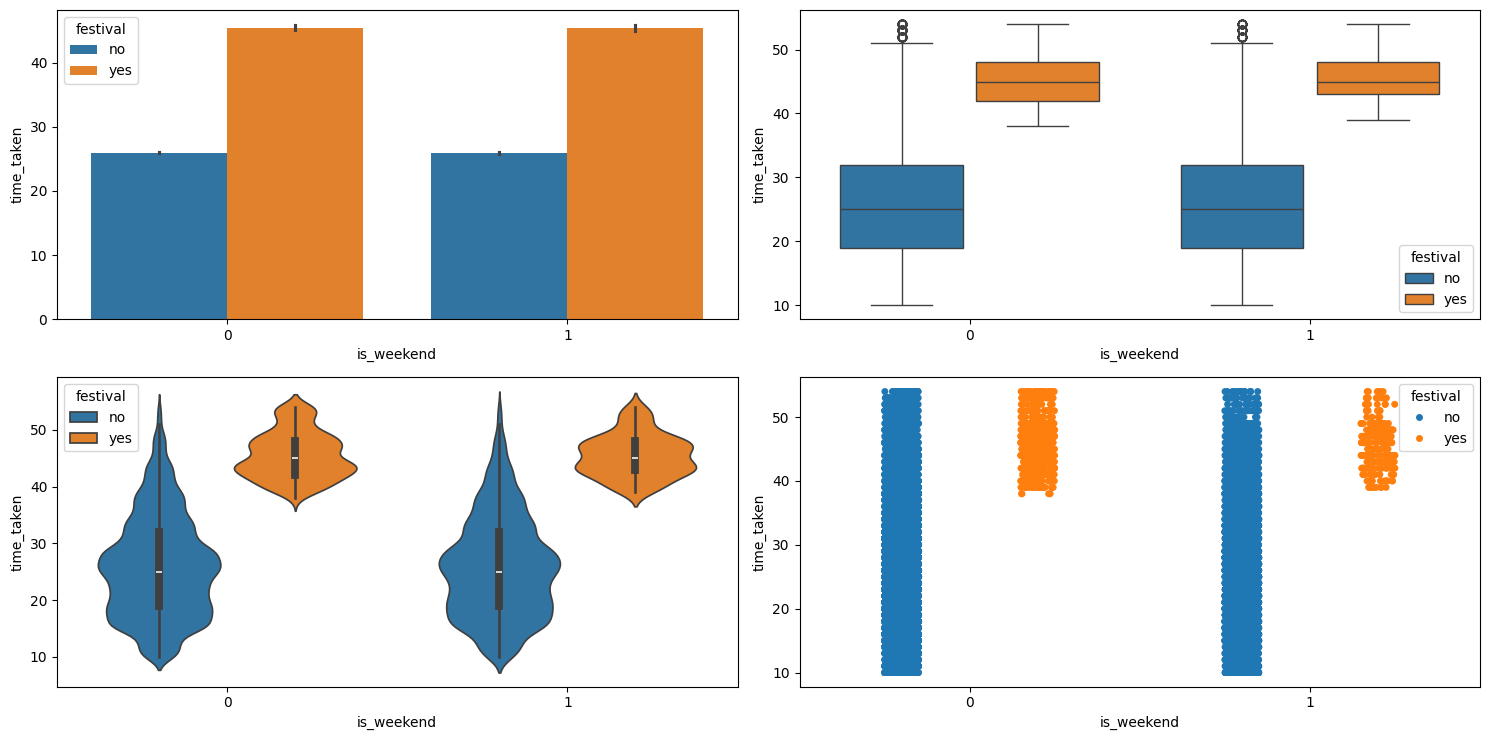

In [330]:
multivariate_analysis(df, "time_taken", "is_weekend", "festival")

- Clearly yes

## Order time

In [331]:
# time related columns

time_subset = df.loc[:,["order_time_hour","order_time_of_day","pickup_time_minutes"]]

time_subset

order_time_hour order_time_of_day  pickup_time_minutes
0                 11.0           morning                 15.0
1                 19.0           evening                  5.0
2                  8.0           morning                 15.0
3                 18.0           evening                 10.0
4                 13.0         afternoon                 15.0
...                ...               ...                  ...
45497             11.0           morning                 10.0
45498             19.0           evening                 15.0
45499             23.0             night                 15.0
45500             13.0         afternoon                  5.0
45501             17.0           evening                  5.0

[45502 rows x 3 columns]

In [332]:
df['order_time_of_day'].value_counts(dropna=False)

order_time_of_day
night             18312
evening           13353
morning            7718
afternoon          4049
NaN                1640
after_midnight      430
Name: count, dtype: int64

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_21217/2787265622.py:17: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



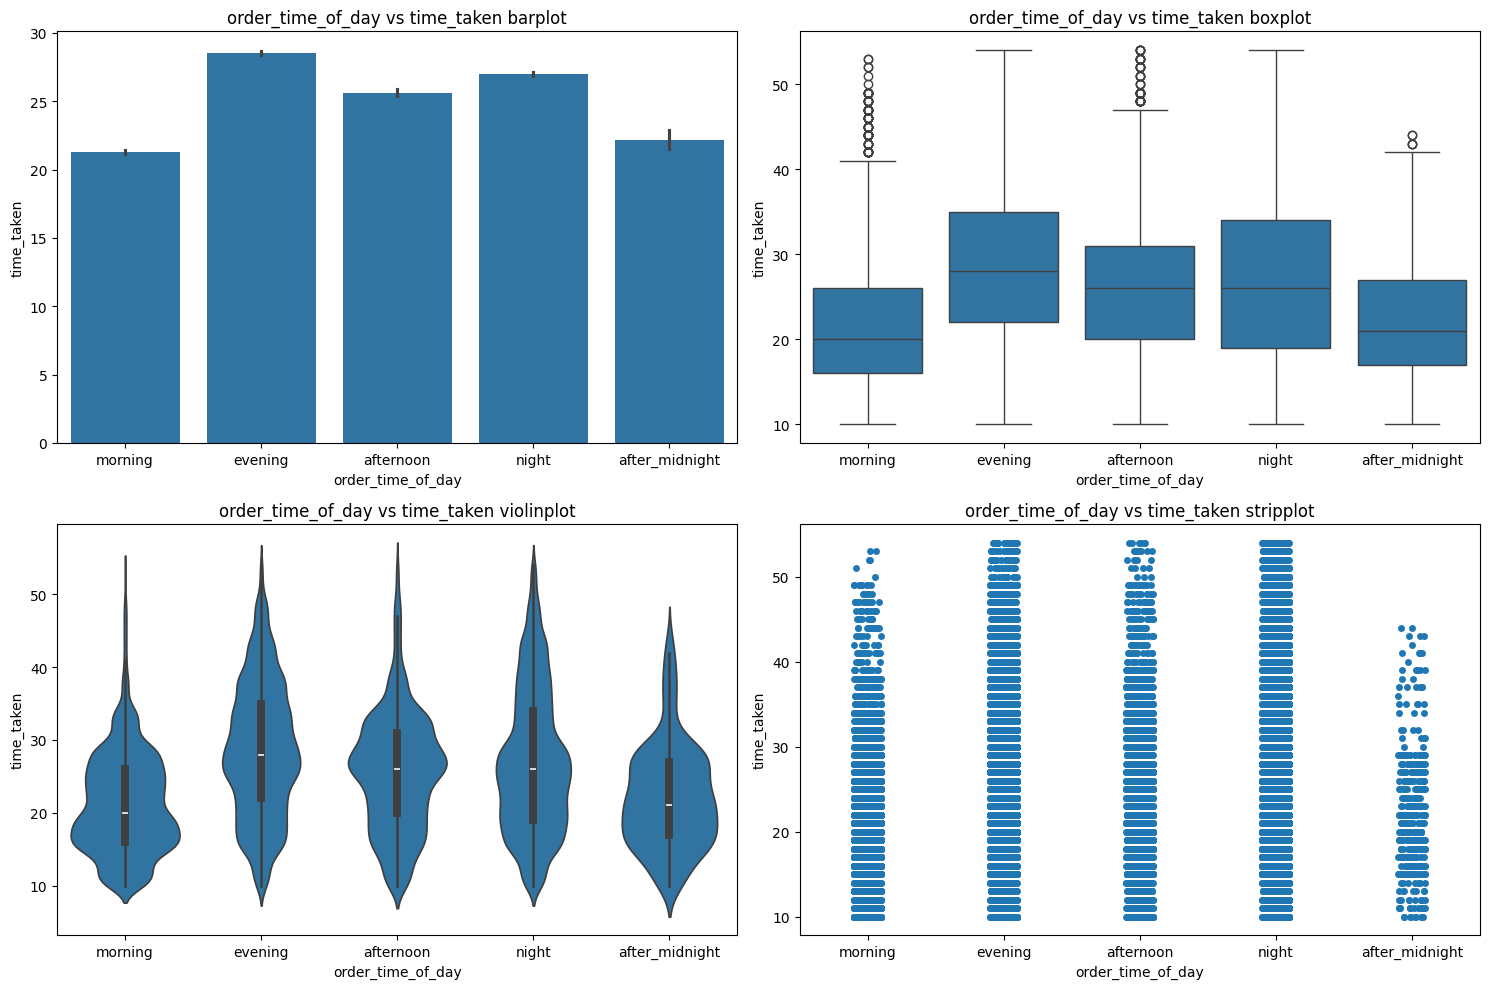

In [333]:
numerical_categorical_analysis(df, "order_time_of_day", "time_taken")

- Morning generally have lower average delivery time
- Evening have longest delivery time and also most spread


In [334]:
# anova test

anova_test(df, "time_taken", "order_time_of_day")

reject null hypothesis -> thre is significant relation between order_time_of_day and time_taken


Count Percentage
order_time_hour                  
21.0              4686     10.68%
19.0              4595     10.48%
22.0              4576     10.43%
20.0              4539     10.35%
23.0              4511     10.28%
18.0              4480     10.21%
17.0              4278      9.75%
10.0              1991      4.54%
11.0              1962      4.47%
9.0               1947      4.44%
8.0               1818      4.14%
12.0               892      2.03%
15.0               873      1.99%
14.0               791       1.8%
13.0               784      1.79%
16.0               709      1.62%
0.0                430      0.98%

num of unique categories = 17
unique categories = [11. 19.  8. 18. 13. 21. 17. 20. 14.  9. 22. 12. 23. nan 10. 16. 15.  0.]


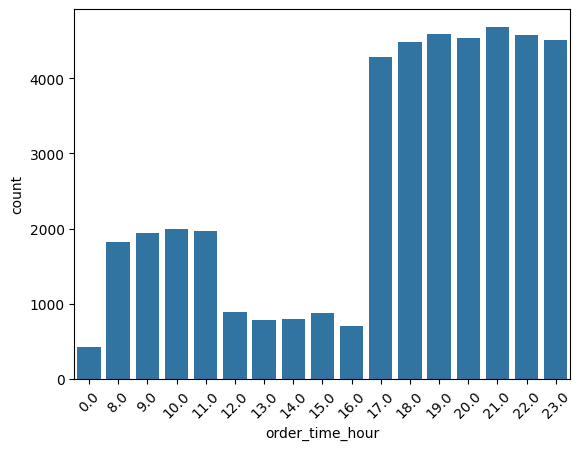

In [335]:
# categorical analysis on order_time_hour

categorical_analysis(df, "order_time_hour")

Count Percentage
order_time_of_day                  
night              18312     41.75%
evening            13353     30.44%
morning             7718      17.6%
afternoon           4049      9.23%
after_midnight       430      0.98%

num of unique categories = 5
unique categories = ['morning' 'evening' 'afternoon' 'night' nan 'after_midnight']


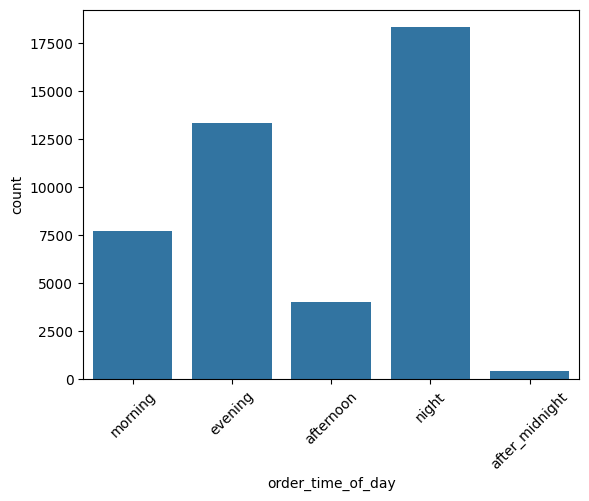

In [336]:
# categorical analysis on time of day

categorical_analysis(df, "order_time_of_day")